In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#   Load and Clean Data

In [3]:
df = pd.read_csv('/Users/annaywj/Downloads/app.csv', sep = ';')
df.head(5)

,time,users,sessions,newusers,crashes
0,22.12.18 09:00,64,60,5,0
1,22.12.18 10:00,79,84,8,0
2,22.12.18 11:00,97,102,22,0
3,22.12.18 12:00,107,102,13,0
4,22.12.18 13:00,105,117,10,2


In [4]:
df.dtypes

time        object
users        int64
sessions     int64
newusers     int64
crashes      int64
dtype: object

In [5]:
df.isnull().sum()

time        0
users       0
sessions    0
newusers    0
crashes     0
dtype: int64

In [6]:
df.drop_duplicates()

,time,users,sessions,newusers,crashes
0,22.12.18 09:00,64,60,5,0
1,22.12.18 10:00,79,84,8,0
2,22.12.18 11:00,97,102,22,0
3,22.12.18 12:00,107,102,13,0
4,22.12.18 13:00,105,117,10,2
...,...,...,...,...,...
164,29.12.18 05:00,40,34,6,0
165,29.12.18 06:00,48,41,8,0
166,29.12.18 07:00,44,37,3,0
167,29.12.18 08:00,38,40,1,0


In [7]:
df.describe()

,users,sessions,newusers,crashes
count,169.000000,169.000000,169.000000,169.000000
mean,74.153846,71.508876,8.301775,0.325444
std,28.776437,29.637114,4.482512,0.790948
min,18.000000,8.000000,1.000000,0.000000
25%,48.000000,47.000000,5.000000,0.000000
50%,72.000000,67.000000,8.000000,0.000000
75%,97.000000,96.000000,11.000000,0.000000
max,141.000000,148.000000,22.000000,6.000000


In [8]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['weekday'] = df['time'].dt.day_name()


# EDA

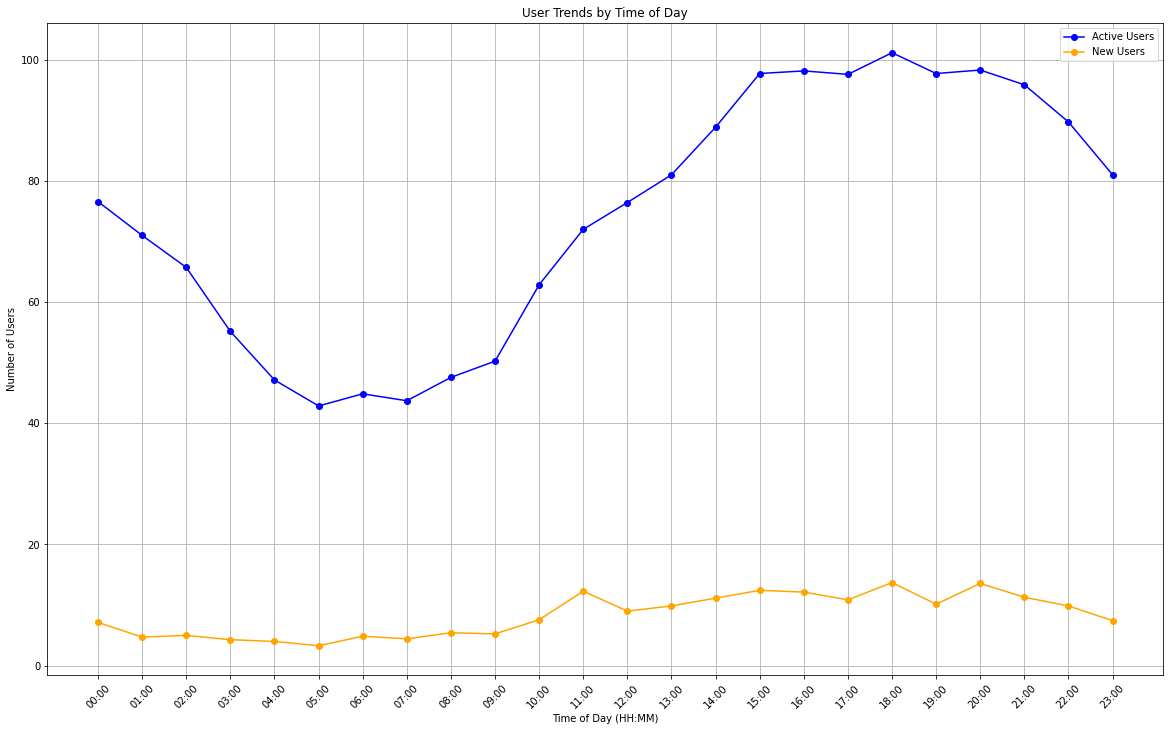

In [9]:
df['hour_minute'] = df['time'].dt.strftime('%H:%M')  

df_time_based = df.groupby('hour_minute', as_index=False)[['users', 'newusers']].mean()

df_time_based = df_time_based.sort_values(by='hour_minute')

plt.figure(figsize=(20,12))
plt.plot(df_time_based['hour_minute'], df_time_based['users'], marker="o", linestyle="-", label="Active Users", color="blue")
plt.plot(df_time_based['hour_minute'], df_time_based['newusers'], marker="o", linestyle="-", label="New Users", color="orange")

plt.title("User Trends by Time of Day")
plt.xlabel("Time of Day (HH:MM)")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)

plt.show()

1. User Trends by Time of Day
User activity is lowest in early morning hours (00:00 - 07:00).
Peak activity occurs between 11:00 AM - 10:00 PM, with the highest engagement in the evening.
New user acquisition remains relatively low but sees slight increases in the afternoon.

- Recommendation:
Schedule promotional campaigns and push notifications between 11:00 AM - 10:00 PM when users are most active.
Offer special discounts during low-activity hours to encourage user engagement earlier in the day.

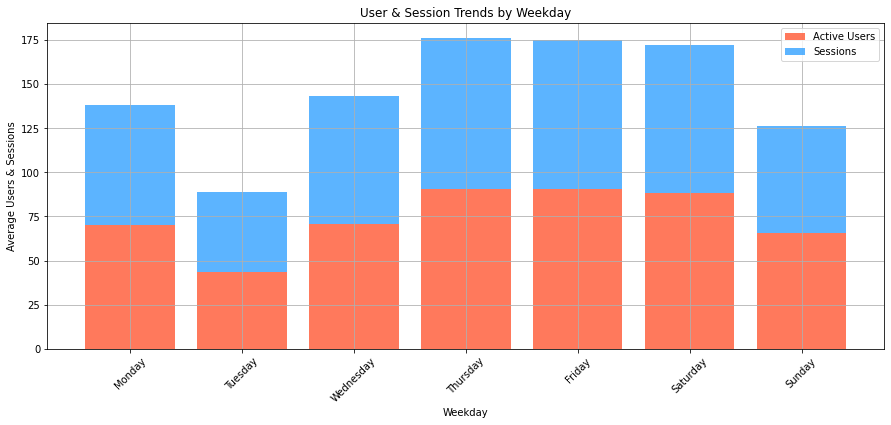

In [10]:
df_weekday = df.groupby('weekday', as_index=False)[['users', 'sessions']].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df_weekday.set_index('weekday').reindex(weekday_order).reset_index()

au_color = "#FF5733" 
sessions_color = "#33A1FF"  

plt.figure(figsize=(15,6))
plt.bar(df_weekday['weekday'], df_weekday['users'], color=au_color, alpha=0.8, label="Active Users")
plt.bar(df_weekday['weekday'], df_weekday['sessions'], bottom=df_weekday['users'], color=sessions_color, alpha=0.8, label="Sessions")

plt.title("User & Session Trends by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Users & Sessions")
plt.xticks(rotation=45)
plt.legend(["Active Users", "Sessions"])
plt.grid(True)

plt.show()

2. User Sessions by Time of Day
The number of sessions increases gradually throughout the day, peaking in the afternoon and early evening (2:00 PM - 9:00 PM).
Session counts decrease sharply after 10:00 PM.

- Recommendation:
Optimize server load & app performance during peak hours (2:00 PM - 9:00 PM) to ensure smooth user experience.
Introduce time-limited deals to encourage more sessions during off-peak hours.

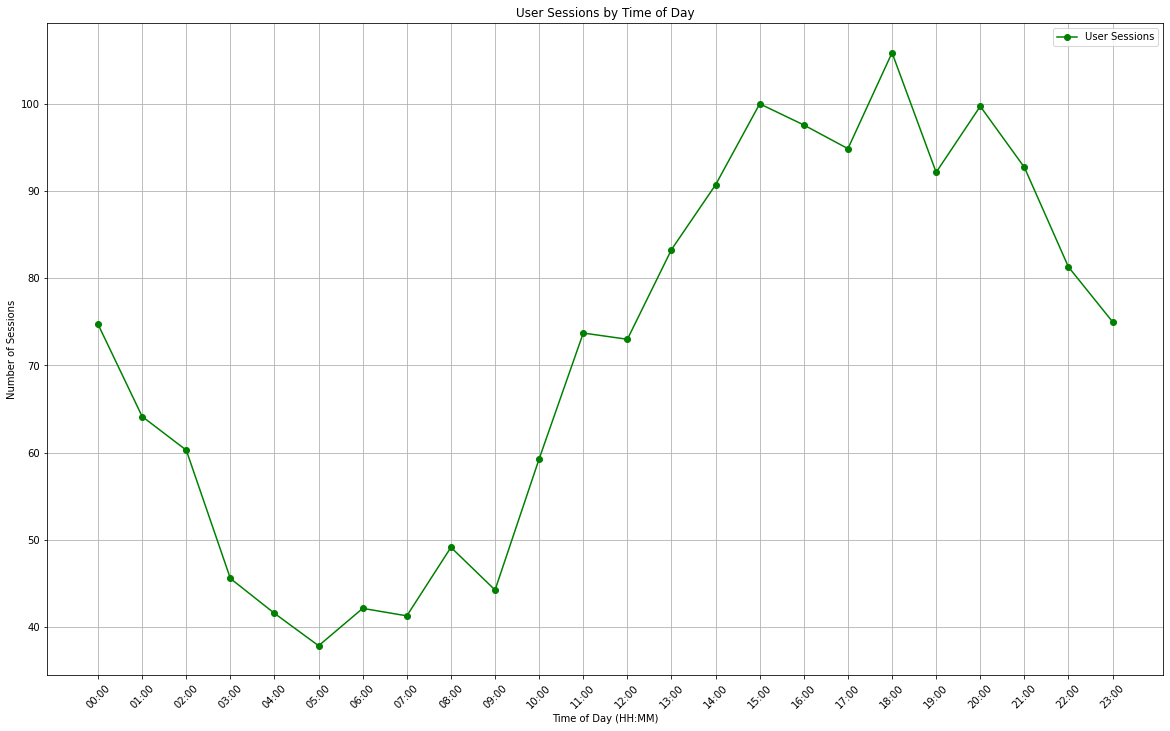

In [11]:
df_time_sessions = df.groupby('hour_minute', as_index=False)['sessions'].mean()

plt.figure(figsize=(20,12))
plt.plot(df_time_sessions['hour_minute'], df_time_sessions['sessions'], marker="o", linestyle="-", label="User Sessions", color="green")

plt.title("User Sessions by Time of Day")
plt.xlabel("Time of Day (HH:MM)")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

3. App Crashes by Time of Day
Crashes occur sporadically throughout the day, with noticeable spikes at 2:00 AM, 6:00 AM, 3:00 PM, and 9:00 PM.
The highest spike in crashes occurs around 2:00 AM and in the afternoon hours.

- Recommendation:
Investigate the causes of crashes during peak times and schedule maintenance or bug fixes during low-usage hours (early morning).
Consider implementing app performance monitoring to detect and resolve issues before peak hours.

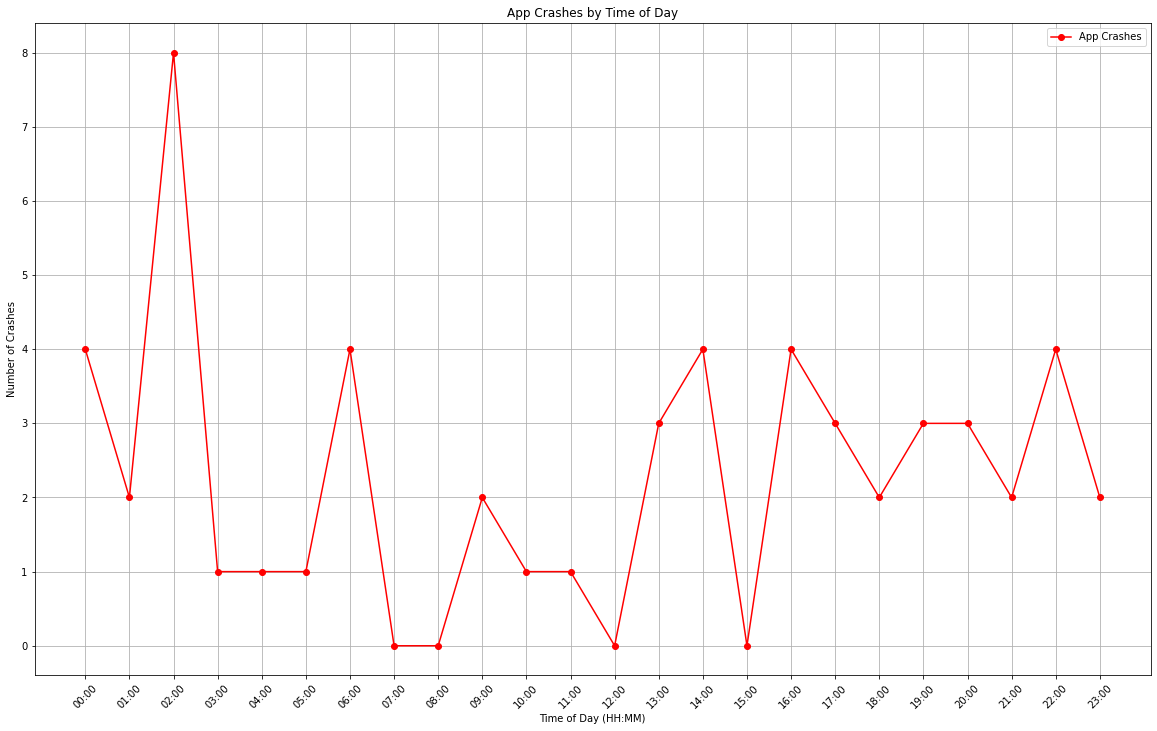

In [12]:
df_time_crashes = df.groupby('hour_minute', as_index=False)['crashes'].sum()

plt.figure(figsize=(20,12))
plt.plot(df_time_crashes['hour_minute'], df_time_crashes['crashes'], marker="o", linestyle="-", label="App Crashes", color="red")

plt.title("App Crashes by Time of Day")
plt.xlabel("Time of Day (HH:MM)")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

4. User & Session Trends by Weekday
User activity increases significantly on Thursdays, Fridays, and Saturdays.
Tuesdays have the lowest engagement.

- Recommendation:
Increase ad spend & promotions on high-traffic days (Thursdays - Saturdays) to maximize revenue.
Offer exclusive deals or incentives on lower-traffic days (Monday - Wednesday) to balance engagement.


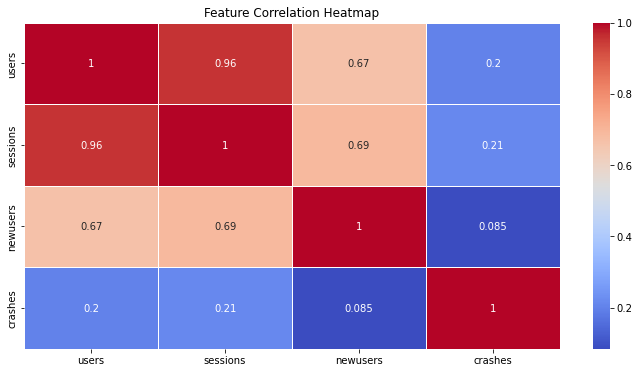

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['users', 'sessions', 'newusers', 'crashes']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

5. User Activity Distribution by Hour (Boxplot)
Higher engagement and user variability occur between noon and late evening.
Early morning hours (4:00 AM - 7:00 AM) have low and consistent engagement.

- Recommendation:
Schedule inventory restocking & system updates in the early morning hours to avoid disruption.
Push real-time promotions in the afternoon and evening to capitalize on high variability in user engagement.


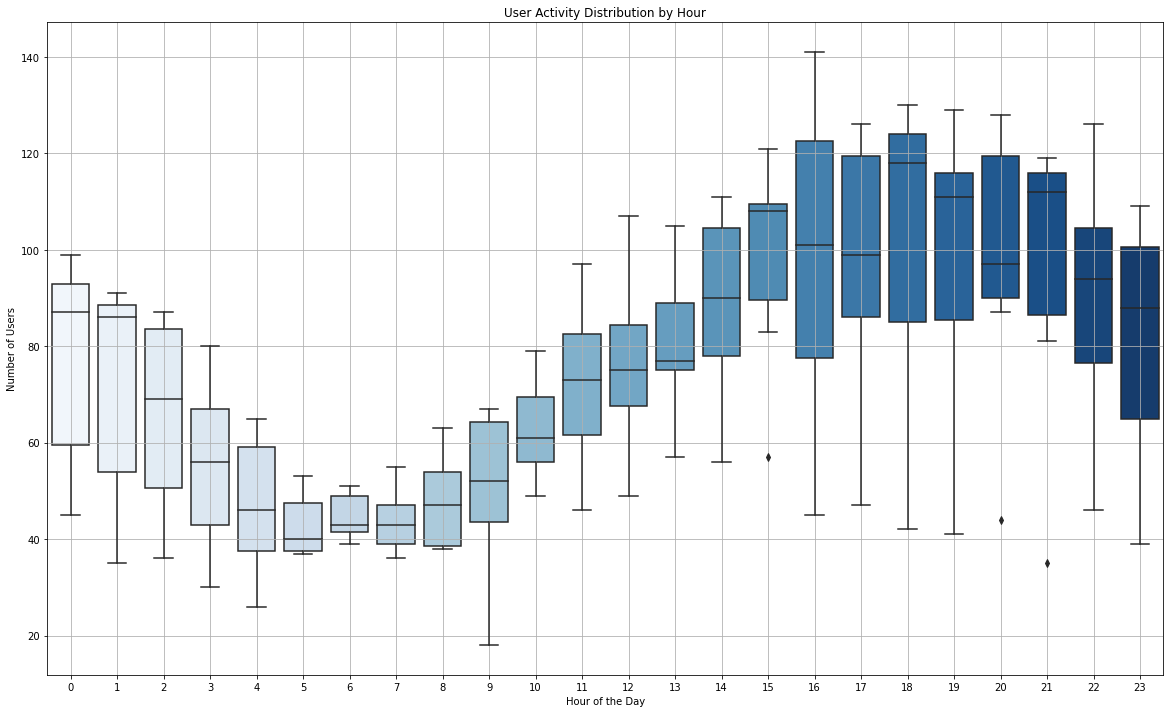

In [14]:
plt.figure(figsize=(20,12))
sns.boxplot(x=df['time'].dt.hour, y=df['users'], palette="Blues")

plt.title("User Activity Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Users")
plt.grid(True)

plt.show()

6. Feature Correlation Heatmap
Users & Sessions (0.96 correlation) → Indicates more sessions mean higher active users.
New Users have a moderate correlation with Sessions (0.69) → Meaning that growth strategies should focus on increasing new user sessions.
Crashes have a weak correlation with engagement (0.2) → But still indicate a negative user experience when they happen.

- Recommendation:
Retarget inactive users with personalized promotions to increase session counts.
Run crash diagnostics & app performance tests to minimize disruptions.
